In [1]:

import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

from statsmodels.formula.api import ols

In [68]:
##Import the CSV file

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")

In [3]:
df.head()

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18


In [4]:
df["log_rainfall"] = np.log(df.rainfall)


 Create a Baseline

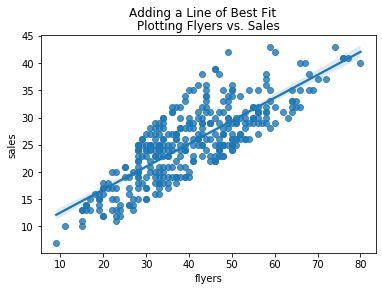

In [5]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Flyers vs. Sales")
sns.regplot(x="flyers", y="sales", data=df)
plt.show()

Prerequisites:
- Establish a baseline
- Produce a super simple model
- Calculate the model and baseline residuals

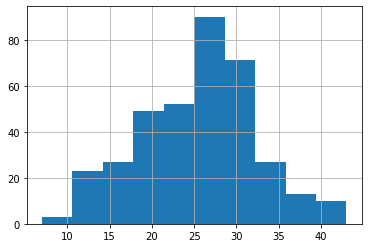

In [6]:
df.sales.hist()

In [8]:
baseline = df.sales.mean()
print(f'Our baseline model is {baseline}')

Our baseline model is 25.323287671232876


In [9]:
##Build a "super-simple model"

In [10]:
model = ols('sales ~ flyers', df).fit()

In [13]:
#Calculate Residuals

In [15]:
evaluate = pd.DataFrame()

In [16]:
evaluate['x'] = df.flyers

In [17]:
# y is our dependent variable
evaluate["y"] = df.sales
evaluate["baseline"] = df.sales.mean()

In [18]:
evaluate["yhat"] = model.predict()


In [19]:
evaluate["baseline_residual"] = evaluate.baseline - evaluate.y


In [20]:
evaluate["model_residual"] = evaluate.yhat - evaluate.y


In [21]:
evaluate.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,15,10,25.323288,14.673754,15.323288,4.673754
1,15,13,25.323288,14.673754,12.323288,1.673754
2,27,15,25.323288,19.727926,10.323288,4.727926
3,28,17,25.323288,20.149107,8.323288,3.149107
4,33,18,25.323288,22.255013,7.323288,4.255013


Evaluate that model's performance and answer if the model is significant.
Evaluate that model's performance and answer if the feature is significant.

In [22]:
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 6083.326244705024


Considering Baseline metrics

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
model_sse = (evaluate.model_residual**2).sum()

mse = mean_squared_error(evaluate.y, evaluate.yhat)

rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


Evaluating the Model Significance

In [26]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.648


Compute the P Value

In [27]:
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)
f_pval < .05


p-value for model significance =  2.193718738113383e-84


True

Confirms the alternative hypothesis that our model built on independent varibles explains the relationship, validates that $R^2$


In [28]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

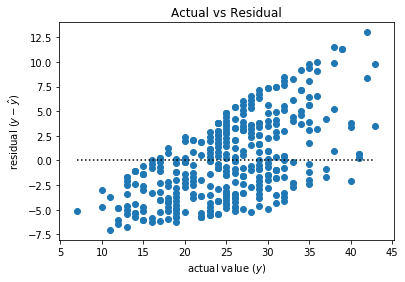

In [29]:
plot_residuals(evaluate.y, evaluate.yhat)


Do the same thing, but comparing rainfall

In [51]:

df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")

In [52]:
df.head()

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18


In [53]:
df["log_rainfall"] = np.log(df.rainfall)


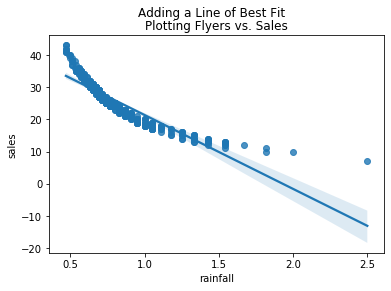

In [54]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Flyers vs. Sales")
sns.regplot(x="rainfall", y="sales", data=df)
plt.show()

 Prerequisites:

Establish a baseline
Produce a super simple model
Calculate the model and baseline residuals

In [55]:
baseline = df.sales.mean()
print(f'Our baseline model is {baseline}')

Our baseline model is 25.323287671232876


In [56]:
from statsmodels.formula.api import ols

model = ols('sales ~ rainfall', df).fit()

In [57]:
evaluate = pd.DataFrame()

evaluate["x"] = df.rainfall

evaluate["y"] = df.sales
evaluate["baseline"] = df.sales.mean()

evaluate["yhat"] = model.predict()

evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head(4)

,x,y,baseline,yhat,baseline_residual,model_residual
0,2.00,10,25.323288,-1.599602,15.323288,-11.599602
1,1.33,13,25.323288,13.773142,12.323288,0.773142
2,1.33,15,25.323288,13.773142,10.323288,-1.226858
3,1.05,17,25.323288,20.197573,8.323288,3.197573


In [58]:
#Compare the model to the baseline

In [59]:
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 2998.2371310300655


In [60]:
#Consider evaluation metrics

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt

model_sse = (evaluate.model_residual**2).sum()

mse = mean_squared_error(evaluate.y, evaluate.yhat)

rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 2998.2371310300655  which is the sum sf squared errors
MSE is 8.21434830419196  which is the average squared error
RMSE is 2.866068440249109  which is the square root of the MSE


In [62]:
#Evaluate model significance

In [63]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.827


In [64]:
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  3.2988846597381e-140


In [65]:
f_pval < .05


True

In [67]:
#Confirm the alternative hypothesis

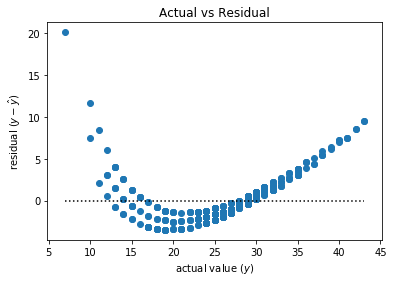

In [66]:
plot_residuals(evaluate.y, evaluate.yhat)


In [31]:
from statsmodels.formula.api import ols
from pydataset import data

df = data("tips")



In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


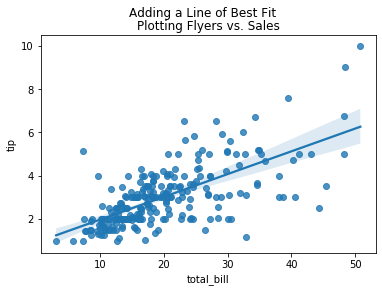

In [33]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Flyers vs. Sales")

sns.regplot(x="total_bill", y="tip", data=df)
plt.show()

Prerequisites:
    - Establish a baseline
    - Produce a super simple model
    - Calculate the model and baseline residuals

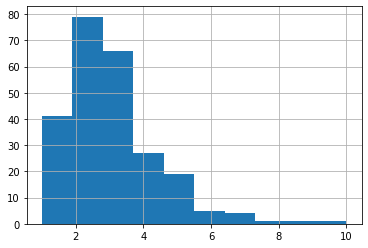

In [34]:
df.tip.hist()

In [37]:
baseline = df.tip.mean()
print(baseline)

2.9982786885245902


Create a model

In [38]:
from statsmodels.formula.api import ols

model = ols('tip ~ total_bill', df).fit()

Calculate residuals

In [39]:

evaluate = pd.DataFrame()

evaluate["x"] = df.total_bill

evaluate["y"] = df.tip
evaluate["baseline"] = df.tip.mean()

evaluate["yhat"] = model.predict()


evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head(4)

,x,y,baseline,yhat,baseline_residual,model_residual
1,16.99,1.01,2.998279,2.704636,1.988279,1.694636
2,10.34,1.66,2.998279,2.006223,1.338279,0.346223
3,21.01,3.50,2.998279,3.126835,-0.501721,-0.373165
4,23.68,3.31,2.998279,3.407250,-0.311721,0.097250


In [40]:
## Compare model to baseline

In [41]:
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 465.2124770491804
Model SSE 252.788743850776


In [42]:
## Consider evaluation metrics

In [43]:

from sklearn.metrics import mean_squared_error
from math import sqrt

model_sse = (evaluate.model_residual**2).sum()

mse = mean_squared_error(evaluate.y, evaluate.yhat)


rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 252.788743850776  which is the sum sf squared errors
MSE is 1.036019442011377  which is the average squared error
RMSE is 1.0178504025697377  which is the square root of the MSE


In [44]:
## Evaluate the model significance

In [45]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.457


In [47]:
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)
f_pval < .05


p-value for model significance =  6.692470646863376e-34


True

In [49]:
#Confirm our alternative hypothesis that our model built on independent varibles explains the relationship, validates that $R^2$


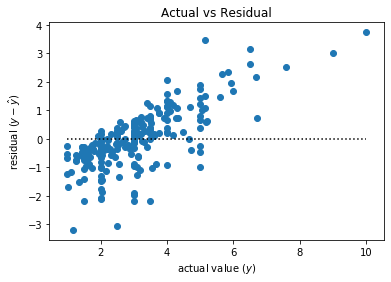

In [50]:
plot_residuals(evaluate.y, evaluate.yhat)


In [70]:
from pydataset import data

In [71]:
df = data('mpg')

In [72]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


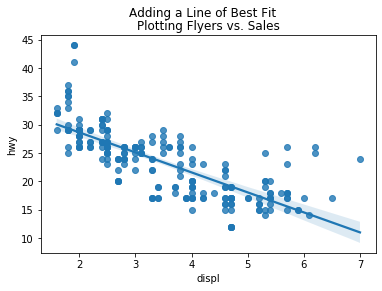

In [73]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Flyers vs. Sales")

sns.regplot(x="displ", y="hwy", data=df)
plt.show()

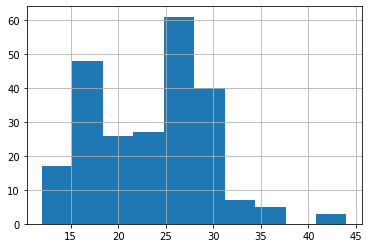

In [74]:
df.hwy.hist()

Prerequisites:
    - Establish a baseline
    - Produce a super simple model
    - Calculate the model and baseline residuals

In [76]:
baseline = df.hwy.mean()
print(baseline)

23.44017094017094


In [77]:
model = ols('hwy ~ displ', df).fit()


In [78]:
##Calculate Residuals

In [80]:
evaluate = pd.DataFrame()

evaluate["x"] = df.displ

evaluate["y"] = df.hwy
evaluate["baseline"] = df.hwy.mean()

evaluate["yhat"] = model.predict()


evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head(4)

,x,y,baseline,yhat,baseline_residual,model_residual
1,1.8,29,23.440171,29.342591,-5.559829,0.342591
2,1.8,29,23.440171,29.342591,-5.559829,0.342591
3,2.0,31,23.440171,28.636473,-7.559829,-2.363527
4,2.0,30,23.440171,28.636473,-6.559829,-1.363527


In [81]:
## Evaluate if model beats baseline

In [82]:
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 8261.66239316239
Model SSE 3413.829008995466


In [83]:
##Consider evaluation metrics

In [84]:
model_sse = (evaluate.model_residual**2).sum()


mse = mean_squared_error(evaluate.y, evaluate.yhat)


rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 3413.829008995466  which is the sum sf squared errors
MSE is 14.589012858954984  which is the average squared error
RMSE is 3.819556631201452  which is the square root of the MSE


In [85]:
#Evaluate the Significance

In [86]:

r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.587


In [87]:
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)
f_pval < .05


p-value for model significance =  2.0389744555910457e-46


True

In [88]:
#We reject the null hypothesis. Our model built on independent varibles explains the relationship, validates that $R^2$

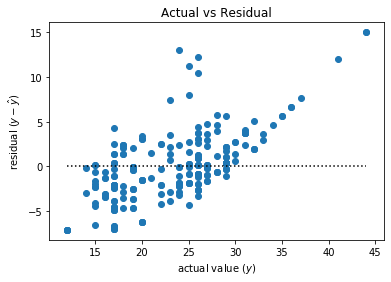

In [89]:
plot_residuals(evaluate.y, evaluate.yhat)
